# Bài 11: Morphology

Các bạn thực hiện bài tập đếm số tế bào máu (số lượng) có trong ảnh sau: 

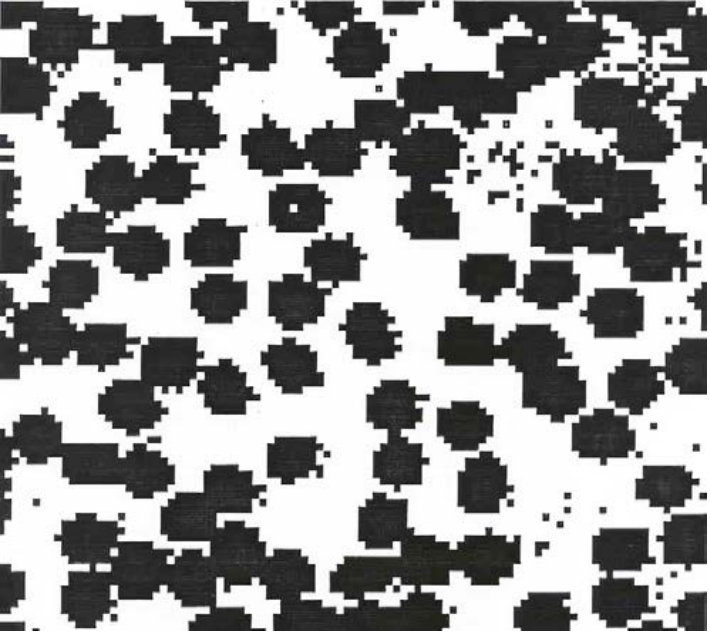

Lưu ý, các bạn được phép sử dụng thư viện OpenCV cho các phép biến đổi morphology.

Input: Ảnh tế bào máu (Bên trên)

Output: Số nguyên cho biết số lượng tế bào máu trong ảnh

In [6]:
import cv2
import numpy as np

In [7]:
img = cv2.imread('img.png', 0)

In [8]:
def sol(img): 
    # 1. Chuyển sang ảnh binary
    ### BEGIN SOLUTION
    (thresh, img) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    ### END SOLUTION

    # 2. Áp dụng các phương pháp morphology
    ### BEGIN SOLUTION
    kernel = np.ones((10,10),np.uint8)
    img = cv2.dilate(img,kernel,iterations = 1)
    kernel = np.ones((15,15),np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    ### END SOLUTION

    # 3. Chuyển sang ảnh âm bản
    ### BEGIN SOLUTION
    img = 255 - img
    ### END SOLUTION

    # 4. Đếm số tế bào 
    ### BEGIN SOLUTION
    cnts = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]
    xcnts = [cnt for cnt in cnts if 3<cv2.contourArea(cnt) <7000]
    result = len(xcnts)
    ### BEGIN SOLUTION
    return result



In [9]:
# thử nghiệm với ví dụ của đề bài
print(f"Số tế bào máu trong ảnh: {sol(img)}.")

Số tế bào máu trong ảnh: 79.


In [10]:
# cham diem voi public test
assert sol(img) > 75

In [11]:
### BEGIN HIDDEN TESTS
def sol_for_test(img): 
    # 1. Chuyển sang ảnh binary
    (thresh, img) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # 2. Áp dụng các phương pháp morphology
    kernel = np.ones((10,10),np.uint8)
    img = cv2.dilate(img,kernel,iterations = 1)
    kernel = np.ones((15,15),np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    
    # 3. Chuyển sang ảnh âm bản
    img = 255 - img
    
    # 4. Đếm số tế bào 
    cnts = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]
    xcnts = [cnt for cnt in cnts if 3<cv2.contourArea(cnt) <7000]
    result = len(xcnts)
    return result

assert sol(img) >= sol_for_test(img)
### END HIDDEN TESTS